In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [15]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [16]:
X_train.shape

(8000, 11)

In [17]:
y_train.shape

(8000,)

In [18]:
X_test.shape

(2000, 11)

In [19]:
y_test.shape

(2000,)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scle = scaler.fit_transform(X_train)
X_test_scle = scaler.transform(X_test)

In [21]:
X_train_scle

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [22]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [23]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 172
Trainable params: 172
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history=model.fit(X_train_scle,y_train, epochs=50,validation_split=0.2 )

Epoch 1/50
200/200 [==============================] - 2s 3ms/step - loss: 0.6915 - accuracy: 0.6481 - val_loss: 0.6450 - val_accuracy: 0.7962
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.7931 - val_loss: 0.6038 - val_accuracy: 0.7987
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.7939 - val_loss: 0.5707 - val_accuracy: 0.8006
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.8002 - val_loss: 0.5390 - val_accuracy: 0.8181
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.8134 - val_loss: 0.5120 - val_accuracy: 0.8269
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.8194 - val_loss: 0.4859 - val_accuracy: 0.8338
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.8288 - val_loss: 0.4596 - val_accuracy: 0.8462
Epoch 

In [27]:
model.layers[0].get_weights()

[array([[ 0.0174295 , -0.08145645,  0.04618982, -0.10979959, -0.5470348 ,
         -0.23062794, -0.00673344, -0.2990252 ,  0.16730763,  0.27008882,
         -0.31490493],
        [-0.7654676 ,  0.04961259, -0.63107294,  0.74565065,  0.35701278,
          0.26423374, -0.85453266,  0.6908801 ,  0.01324322, -0.05192211,
         -0.81235164],
        [-0.42091745, -0.01309024,  0.07579023, -0.01864029, -0.09573029,
         -0.373931  , -0.10970704,  0.60390717, -0.09946019,  0.04393467,
         -0.101621  ],
        [-0.09974849,  0.75462455,  0.46108878,  0.0552244 ,  0.50522673,
         -0.60375947, -0.03903612, -0.42048532, -0.09688883,  0.12241345,
         -0.5148824 ],
        [ 0.63060856, -0.42844084,  0.32974282,  0.9362791 ,  1.1761911 ,
         -0.2346014 , -0.06434961, -0.25535715, -0.42706627,  1.0615721 ,
          0.43325922],
        [-0.13379762, -0.0687426 ,  0.389858  , -0.00969821, -0.15415595,
         -0.35269788, -0.2639261 ,  0.06869631,  0.05782174,  0.1212750

In [28]:
model.layers[1].get_weights()

[array([[-0.57216597, -0.652403  ,  0.086844  ],
        [ 0.9402816 ,  0.09913808, -0.67370266],
        [-0.12712812, -0.80598396, -0.2203675 ],
        [-1.0689247 , -1.1727194 ,  0.9121851 ],
        [-0.9534532 ,  0.62018794,  0.837731  ],
        [ 0.3500419 ,  0.58332855, -0.44938573],
        [-0.42387956, -0.8372065 , -0.6871626 ],
        [ 0.0049147 ,  0.31689376, -0.81124616],
        [ 0.8413439 ,  0.6059185 , -0.5264843 ],
        [-0.70526284, -0.05743315,  1.1029595 ],
        [ 0.7360108 , -1.3646064 , -0.2830089 ]], dtype=float32),
 array([ 0.18790092,  0.3312456 , -0.4092592 ], dtype=float32)]

In [29]:
# history = model.fit(X_train_scle,y_train,epochs=100,validation_split=0.2)

In [30]:
y_log = model.predict(X_test_scle)

In [31]:
y_pred=np.where(y_log>0.5,1,0) #if grater than 0.5 then 1 or else 0

In [32]:
# y_pred = y_pred.argmax(axis=-1)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.857

In [34]:
history.history

{'loss': [0.6915032863616943,
  0.6250864267349243,
  0.5894261002540588,
  0.5585976243019104,
  0.529582142829895,
  0.503176212310791,
  0.4758104085922241,
  0.4495176374912262,
  0.4301481246948242,
  0.4156232476234436,
  0.4045044183731079,
  0.3950563371181488,
  0.3878670930862427,
  0.38124191761016846,
  0.37568023800849915,
  0.3711855411529541,
  0.36702120304107666,
  0.36363521218299866,
  0.36061421036720276,
  0.3583129942417145,
  0.3559710681438446,
  0.35398373007774353,
  0.35242125391960144,
  0.35050490498542786,
  0.3492491543292999,
  0.3478301167488098,
  0.3459785580635071,
  0.3445923924446106,
  0.34353014826774597,
  0.34212857484817505,
  0.3411456346511841,
  0.3403581380844116,
  0.3396329879760742,
  0.3388935327529907,
  0.3383805453777313,
  0.3372315466403961,
  0.3369060158729553,
  0.3361643850803375,
  0.3359493315219879,
  0.33534714579582214,
  0.33487507700920105,
  0.334184467792511,
  0.3337271809577942,
  0.3329961895942688,
  0.33325287699

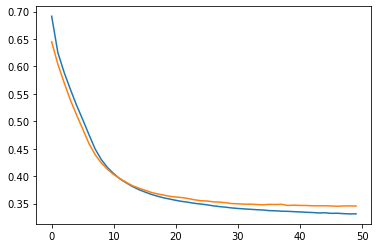

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

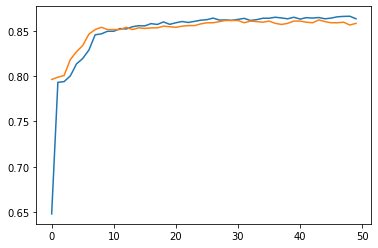

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])